<a href="https://colab.research.google.com/github/DSlaughter01/machine_learning/blob/main/SVM_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9: Homework 3

----------------------------------------------------
Machine Learning                      

Year 2021/2022

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* and *Emilio Parrado Hernández emipar@tsc.uc3m.es*

----------------------------------------------------

**Team Members:**

1.   Daniel Slaughter
2.   Devashish Sonowal


The aim of this HW is to analyse the performance of SVMs with different configurations (different kernels and parameters), learn to design own (problem/expertise guided) kernel functions, as well as study different approaches to combine the SVM training with a feature selection stage.

To carry out this task, we are going to work with [Arrhythmia dataset](http://archive.ics.uci.edu/ml/datasets/Arrhythmia) from the UCI repository. Let's start loading and preparing the data and, next, you will have to complete the proposed exercises.

## Load and prepare the data


The orginal aim of this problem is to detect the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal', whereas ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones. For this purpose, this database contains $279$ samples with $206$ features with information about patient information (age, sex, height, weight) and cardiac characteristics, such as, the heart rate and parameters of several ECG channels. For the purpose of this notebook, let's convert this dataset to binary problem (arrhythmia/normal).

Next cell code includes the code to:
* Load the dataset.
* Data preparation: fill missing values and convert from multiclass to binary problem.
* Create training and testing partitions with the 80% and 20% of the original data
* Normalize the data to zero mean and unitary standard deviation

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data", header= None)
#data=pd.read_csv("arrhythmia.data",header=None)
data = data.replace('?', np.nan).astype(float)
data.fillna(data.mean(),inplace=True)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [ ]:
X = data[data.columns[:-1]].values
Y = np.where(data[data.columns[-1]].values>1,0,1)  # Convert to binary classification: 0 normal, 1 arrhythmia

In [ ]:
X.shape # We have 452 samples and 279 features

(452, 279)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create data partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(361,)


### Exercise 1. Analysis of SVM performance (2 points)

The goal of this first exercise is to compare the performance of a linear SVM vs. a non-linear SVM with a RBF kernel. For this purpose, you have to complete the following sections.

Note: Do not forget to cross validate their free parameters.


### Exercise 1.1. Linear SVM
Train and evalute the test performance of a linear SVM

### Solution

In [ ]:
# LINEAR KERNEL
# <SOL>

# Some notes:
# C may be changed - it is inversely proportional to the regularisation, with a squared L2 penalty
# C adds a penalty for misclassified points - if the penalty is high, we allow fewer misclassifications

# We could do this with SVC(kernel = 'linear'), or with LinearSVC, which is supposed to generalise better (according to sklearn)

# linear_svc_2 gives a warning: failed to converge.
# To avoid this, we have to set C appropriately, or increase max_iterations (default = 1000)

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

# Our 2 options for our linear SVC
linear_svc_1 = SVC(kernel = 'linear')
linear_svc_2 = LinearSVC()



# The C parameter trades off correct classification of training examples...
# ...against maximization of the decision function’s margin.
# A lower C will encourage a larger margin, therefore a simpler decision...
# ...function, at the cost of training accuracy.
#c_range=np.logspace(-3, 10, 14)
c_range = [10**(i) for i in range(-3, 5, 1)]
lin_vary_this = {'C': c_range}

# 2 grid searches - one for each SVC option - questions over which scoring metric to use
lin_svc_1_gs = GridSearchCV(estimator = linear_svc_1,
                            param_grid = lin_vary_this,
                            cv = 10)

lin_svc_2_gs = GridSearchCV(estimator = linear_svc_2,
                            param_grid = lin_vary_this,
                            cv = 10)

# Train and test the models
lin_svc_1_gs.fit(X_train, Y_train)
lin_svc_2_gs.fit(X_train, Y_train)

# store the accuracies
# train acc
lin_1_trainScore = lin_svc_1_gs.score(X_train, Y_train)
lin_2_trainScore = lin_svc_2_gs.score(X_train, Y_train)

# test acc
lin_1_testScore = lin_svc_1_gs.score(X_test, Y_test)
lin_2_testScore = lin_svc_2_gs.score(X_test, Y_test)

# Find out its best parameters
lin_1_bp = lin_svc_1_gs.best_params_
lin_2_bp = lin_svc_2_gs.best_params_

# </SOL>

### Exercise 1.2. Non-linear SVM
Train and evalute the test performance of a SVM with a RBF kernel

In [ ]:
# We can change gamma - either 'auto', 'scale', or a float
# The gamma parameters can be seen as the inverse of the...
# ...radius of influence of samples selected by the model as support vectors.
# i.e. lower gamma = farther influence
# Using the gamma range from the exercise in the KernelMethods worksheet
gamma_range = [0.125*(2**i)/X_train.shape[1] for i in range(7)]
nonlin_vary_this = {'C': c_range, 'gamma': gamma_range}

# Define our model - SVC's default kernel is 'rbf' as required for this question
nonlinear_svc = SVC(kernel='rbf')

# Grid search for the RBF kernel
nonlin_svc_gs = GridSearchCV(estimator = nonlinear_svc,
                            param_grid = nonlin_vary_this,
                            cv = 10)

nonlin_svc_gs.fit(X_train, Y_train)
nl_bp = nonlin_svc_gs.best_params_
nl_trainScore = nonlin_svc_gs.score(X_train, Y_train)
nl_testScore = nonlin_svc_gs.score(X_test, Y_test)

# </SOL>

### Exercise 1.3. Analysis of the results

Compare both results (analysing the optimal parameters used by each model) and provide your comments/conclusions.

In [ ]:
# Options: pd dataframe, dictionary (sorted)

columns = ['Model', 'Train Accuracy','Test Accuracy', 'Optimum C', 'Optimum gamma']
model_names = [linear_svc_1, linear_svc_2, nonlinear_svc]
model_trainscores = [lin_1_trainScore, lin_2_trainScore, nl_trainScore]
model_testscores = [lin_1_testScore, lin_2_testScore, nl_testScore]
model_opt_c = [lin_1_bp['C'], lin_2_bp['C'], nl_bp['C']]
model_opt_gamma = ['NA', 'NA', nl_bp['gamma']]

gs_data = np.array([model_names, model_trainscores, model_testscores,model_opt_c, model_opt_gamma])
df = pd.DataFrame(data = np.transpose(gs_data), columns = columns)
print('A table of the optimal parameters and scores of different models is shown below:\n\n', df)

A table of the optimal parameters and scores of different models is shown below:

                   Model Train Accuracy Test Accuracy Optimum C Optimum gamma
0  SVC(kernel='linear')       0.883657       0.78022      0.01            NA
1           LinearSVC()       0.850416      0.769231     0.001            NA
2                 SVC()       0.878116      0.802198        10      0.000448


### Comments

**Accuracy**: The nonlinear (RBF) SVM gives the best test accuracy. However, the difference is not very significant.

**C**: The linear SVMs pick lower C as compared to the nonlinear SVM. This means the margin of the hyperplane is greater in the linear case. In other words, there will be more misclassified points in the linear case, which is what we observe from the test accuracies.

**Gamma**: The nonlinear SVM picks C=10, , which means the model may overfit. However, it picks a small gamma, which reduces the model complexity. Therefore, the high penalization due to a large C does not lead to overfitting in our case.

Since the nonlinear model selects a small gamma, the region of influence of any selected support vector would include the whole training set. Therefore, the model behaves similar to a linear model. We can also support this observation with the fact that both the linear and the nonlinear models give similar test accuracies. With a higher gamma, the nonlinear SVM (RBF) may give us a better and more complex model. But, with the given dataset this is the best we get.

# Exercise 2. Design of specific kernels

To improve the performance of the above models, we have examined the data set in detail and we have realized that there are two types or subsets of variables:
1. Demographics and general ECG parameters (including the heart rate): features #0-#14
2. Channel parameters (width, amplitude, ...): features #15-#278

We have talked about this with an expert. As result, he has indicated us that the demographics and general ECG parameters are quite important and that the model should give them as much importance as the channel parameters. And, in addition, he has pointed out that there are non-linear relationships within these feature groups that should be exploited by the model to obtain performance gains.

To take this information into account, we have thought of designing a specific kernel that, firstly, combines the variables of each group non-linearly and, later, it combines both groups linearly. In other words, exploiting the fact that a linear combination of kernels is a kernel,  we can construct a framework to linearly
combine RBF kernels with different values of $\gamma$, one for the demographics and general ECG features and another for the channel parameters. Therefore, we propose to use the following kernel:

$$ K(\bf{x}, \bf{x'}) = \lambda K_{S_1}(\bf{x}_{S_1}, \bf{x}_{S_1}') + (1-\lambda) K_{S_2}(\bf{x}_{S_2}, \bf{x}_{S_2}') $$

where
- $K_{S_1}$ is the kernel that acts in the first group of features (demographics and general ECG).
- $K_{S_2}$ is the kernel that acts in the second group (channel parameters).
- $\bf{x}_{S_1}$ is subset of data using only the features of group 1  (demographics and general ECG parameters).
- $\bf{x}_{S_2}$ is subset of data using only the features of group 2  (channel parameters).
- $0< \lambda <1$ is a combination parameter. The extreme values $\lambda =0$ and $\lambda =1$ mean only one of the two sources of information is considered.






## Exercise 2.1 (2 points)

Analyse the resulting model performance when we train a SVM with this predefined kernel for $\lambda = [0, 0.1, 0.2, ..., 1]$. Besides, analyse the impact of considering $K_{S_1}$ and $K_{S_2}$ being either linear or RBF kernels. In case you are using RBF kernel, to avoid selecting the optimum value of either $\gamma_1$ or $\gamma_2$, you can set their values to $1/\#S_1$ and $1/\#S_2$ (being $\#S_i$ the number of elements in the subset  $S_i$). Anyway, I advise you to cross validate the value of $C$.

HINT: To complete this exercise, you can use the functions: [`sklearn.metrics.pairwise.linear_kernel`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.linear_kernel.html#sklearn.metrics.pairwise.linear_kernel) and [`sklearn.metrics.pairwise.rbf_kernel`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html#sklearn.metrics.pairwise.rbf_kernel); and, additionally, check as you can set the parameter `kernel` of the SVC class to `precomputed` so that you can use precomputed kernels.

Finally, analyse the results:
* Does this trick provide any advantage? Why?
* How can you really exploit the full potential of this approach?

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import accuracy_score

# Precompute K1 and K2 for training data S1 and S2 (4 combinations).
      # parameter 'gamma' defaults to 1/ n_features
tr_lin_feat1, tr_lin_feat2 = linear_kernel(X_train[:,:15]), linear_kernel(X_train[:,15:])
tr_rbf_feat1, tr_rbf_feat2 = rbf_kernel(X_train[:,:15]), rbf_kernel(X_train[:,15:])
      # linear_kernel(X,Y)  outputs the kernel matrix sized...
      # ...(n_samples_X, n_samples_Y)... same for rbf_kernel

# Same for test data
te_lin_feat1, te_lin_feat2 = linear_kernel(X_test[:,:15], X_train[:,:15]), linear_kernel(X_test[:, 15:], X_train[:, 15:])
te_rbf_feat1, te_rbf_feat2 = rbf_kernel(X_test[:,:15], X_train[:,:15]), rbf_kernel(X_test[:,15:], X_train[:,15:])

# Set up our global lists for overall C scores (line 1) and corresponding scores (line 2) for cross validation
lin_best_C, rbf_best_C, lin_rbf_best_C, rbf_lin_best_C = [], [], [], []
lin_best_scores, rbf_best_scores, lin_rbf_best_scores, rbf_lin_best_scores = [], [], [], []
lin_best_scoresTR, rbf_best_scoresTR, lin_rbf_best_scoresTR, rbf_lin_best_scoresTR = [], [], [], []

# Lists for looping
C_list = [lin_best_C, rbf_best_C, lin_rbf_best_C, rbf_lin_best_C]
score_list_te = [lin_best_scores, rbf_best_scores, lin_rbf_best_scores, rbf_lin_best_scores]
score_list_tr = [lin_best_scoresTR, rbf_best_scoresTR, lin_rbf_best_scoresTR, rbf_lin_best_scoresTR]

# Run over different values of lambda
lambda_list = np.arange(0, 1, 0.1)

for lamb in lambda_list:

  # Define each model (one for each kernel)
  model_list = [SVC(kernel = 'precomputed')] * 4

  # Define linear combinations of our training kernels
  k_linear = lamb*tr_lin_feat1 + (1 - lamb)*tr_lin_feat2
  k_rbf= lamb*tr_rbf_feat1 + (1- lamb)*tr_rbf_feat2
  k_lin_rbf = lamb*tr_lin_feat1 + (1 - lamb)*tr_rbf_feat2
  k_rbf_lin = lamb*tr_rbf_feat1 + (1 - lamb)*tr_lin_feat2

  # Define linear combinations of our test kernels
  k_test_lin = lamb*te_lin_feat1 + (1 - lamb)*te_lin_feat2
  k_test_rbf= lamb*te_rbf_feat1 + (1- lamb)*te_rbf_feat2
  k_test_lin_rbf = lamb*te_lin_feat1 + (1 - lamb)*te_rbf_feat2
  k_test_rbf_lin = lamb*te_rbf_feat1 + (1 - lamb)*te_lin_feat2

  # Define kernel lists for looping
  k_train_list = [k_linear, k_rbf, k_lin_rbf, k_rbf_lin]
  k_test_list = [k_test_lin, k_test_rbf, k_test_lin_rbf, k_test_rbf_lin]

  # Loop corresponds to an index in each list: linear + linear, RBF + RBF, linear + RBF, RBF + linear
  for i in range(4):

    # Cross validation of C for each value of lambda, and each type of kernel
    model_gs = GridSearchCV(estimator = model_list[i],
                            param_grid = lin_vary_this,
                            cv = 10)

    # Fit
    model_gs.fit(k_train_list[i], Y_train)

    # Predict over test and train kernels
    prediction_train = model_gs.predict(k_train_list[i])
    prediction_test = model_gs.predict(k_test_list[i])

    # Best parameter C for each model and each value of lambda
    C_list[i].append(model_gs.best_params_['C'])

    # Scores with the best parameters
    score_list_tr[i].append(accuracy_score(prediction_train, Y_train))
    score_list_te[i].append(accuracy_score(prediction_test, Y_test))

# Very long runtime for lambda = 1. Why?

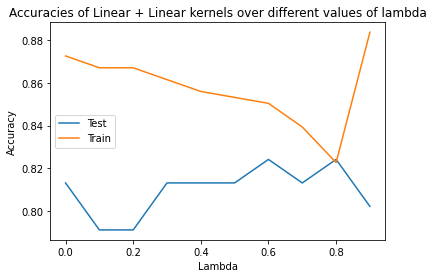

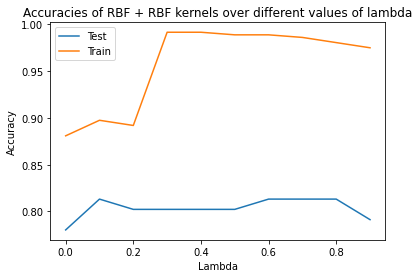

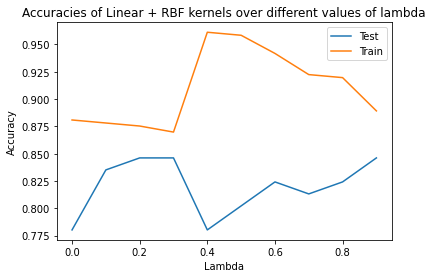

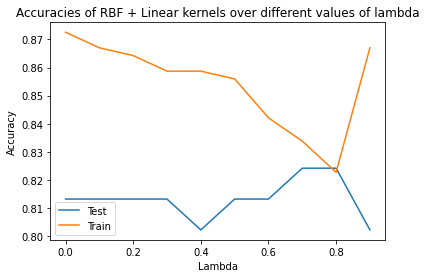

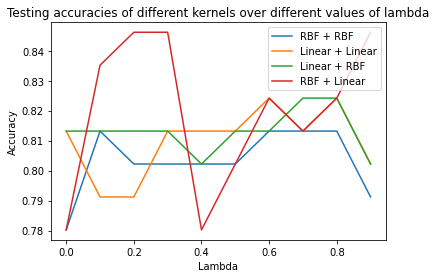

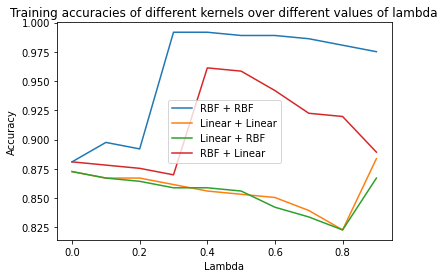

Training accuracy scores for different values of lambda over a combination of linear and RBF kernels:

    Lambda  Linear + Linear  RBF + RBF  Linear + RBF  RBF + Linear
0     0.0         0.872576   0.880886      0.880886      0.872576
1     0.1         0.867036   0.897507      0.878116      0.867036
2     0.2         0.867036   0.891967      0.875346      0.864266
3     0.3         0.861496   0.991690      0.869806      0.858726
4     0.4         0.855956   0.991690      0.961219      0.858726
5     0.5         0.853186   0.988920      0.958449      0.855956
6     0.6         0.850416   0.988920      0.941828      0.842105
7     0.7         0.839335   0.986150      0.922438      0.833795
8     0.8         0.822715   0.980609      0.919668      0.822715
9     0.9         0.883657   0.975069      0.889197      0.867036
Test accuracy scores for different values of lambda over a combination of linear and RBF kernels:

    Lambda  Linear + Linear  RBF + RBF  Linear + RBF  RBF + Linear
0   

In [ ]:
# Plot accuracies on a graph
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(lambda_list, lin_best_scores, label = 'Test')
plt.plot(lambda_list, lin_best_scoresTR, label = 'Train')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies of Linear + Linear kernels over different values of lambda')

plt.figure(2)
plt.plot(lambda_list, rbf_best_scores, label = 'Test')
plt.plot(lambda_list, rbf_best_scoresTR, label = 'Train')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies of RBF + RBF kernels over different values of lambda')

plt.figure(3)
plt.plot(lambda_list, lin_rbf_best_scores, label = 'Test')
plt.plot(lambda_list, lin_rbf_best_scoresTR, label = 'Train')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies of Linear + RBF kernels over different values of lambda')

plt.figure(4)
plt.plot(lambda_list, rbf_lin_best_scores, label = 'Test')
plt.plot(lambda_list, rbf_lin_best_scoresTR, label = 'Train')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies of RBF + Linear kernels over different values of lambda')

plt.figure(5)
plt.plot(lambda_list, rbf_best_scores, label = 'RBF + RBF')
plt.plot(lambda_list, lin_best_scores, label = 'Linear + Linear')
plt.plot(lambda_list, rbf_lin_best_scores, label = 'Linear + RBF')
plt.plot(lambda_list, lin_rbf_best_scores, label = 'RBF + Linear')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Testing accuracies of different kernels over different values of lambda')

plt.figure(6)
plt.plot(lambda_list, rbf_best_scoresTR, label = 'RBF + RBF')
plt.plot(lambda_list, lin_best_scoresTR, label = 'Linear + Linear')
plt.plot(lambda_list, rbf_lin_best_scoresTR, label = 'Linear + RBF')
plt.plot(lambda_list, lin_rbf_best_scoresTR, label = 'RBF + Linear')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training accuracies of different kernels over different values of lambda')

plt.show()

# Present these findings in a table
columns = ['Lambda', 'Linear + Linear', 'RBF + RBF', 'Linear + RBF', 'RBF + Linear']

tr_scores = np.array([np.transpose(lambda_list), np.transpose(lin_best_scoresTR), np.transpose(rbf_best_scoresTR),\
               np.transpose(lin_rbf_best_scoresTR), np.transpose(rbf_lin_best_scoresTR)])

te_scores = np.array([np.transpose(lambda_list), np.transpose(lin_best_scores), np.transpose(rbf_best_scores),\
               np.transpose(lin_rbf_best_scores), np.transpose(rbf_lin_best_scores)])

ar_C = np.array([np.transpose(lambda_list), np.transpose(lin_best_C), np.transpose(rbf_best_C),\
               np.transpose(lin_rbf_best_C), np.transpose(rbf_lin_best_C)])

tab1 = pd.DataFrame(data = np.transpose(tr_scores), columns = columns)
tab2 = pd.DataFrame(data = np.transpose(te_scores), columns = columns)
tab3 = pd.DataFrame(data = np.transpose(ar_C), columns = columns)

print('Training accuracy scores for different values of lambda over a combination of linear and RBF kernels:\n\n', tab1)
print('Test accuracy scores for different values of lambda over a combination of linear and RBF kernels:\n\n', tab2)
print('\nOptimal values of C for different values of lambda over a combination of linear and RBF kernels:\n\n', tab3)


### Discussion

*   Varying `lambda` allows the model to focus on specific sections of the dataset. Since not all features are equally important for the classification, this trick works:

  For some values of `lambda`, test accuracies are better than the those obtained in Exercise 1. This improvement is due to the elementary feature selection trick we carried out.
*  **Do we get advantage of the RBF based combination kernel versus the linear one?**

  No. RBF + RBF tended to overfit in the training data - especially for lambda greater than 0.3, whereas Linear + Linear's training accuracy decreased up until 0.8. We also explored combinations of linear and RBF kernels, and found that using a linear kernel on feature set 1, and an RBF kernel on feature set 2 performs best out of the 4 models.
  
* **Why do you think the RBF kernel can now exploit nonlinear relationships?**

  We are using `gamma=1/n_features`, which means `gamma` equals 0.06 for the first group S1. This is much higher than the gamma used in Exercise 1 (0.000448). A higher value of gamma implies the radius of the area of influence of the support vectors is lower. That would allow our model to behave nonlinearly.

* **Does the solution depend on  λ ?**

  When λ is large, the first group S1 is more relevant. Based on arguments in the previous paragraph, we can say that the (RBF+RBF) model should show more nonlinear behaviour for larger λ. Indeed, we see from the plot that we get the maximum test accuracy for RBF+RBF when λ is large.

  From the table above, for all the four models, we see that for larger values λ, the value of `C` is larger. This means that the margin of the hyperplane we obtain gets smaller as λ is increased.

* **How can you really exploit the full potential of this approach?**

  In order to exploit the full potential, feature selection must be done on each subset of the data. We could also crossvalidate the value of gamma, to create more nonlinear relationships between the second feature set. In short, find the optimum of: gamma, C, and lambda, and reduce the number of features.

## Exercise 2.2 **Advanced** design of specific kernels (2 points)

To exploit the weaponry of sklearn in what respect to learning/cross-validate parameters for a classifier, you have to design your own object `DualKernelSVM` as a instantiation of the class estimator of sklearn.

Basically your `DualKernelSVM` object will have to encapsulate a  `sklearn.svm.SVC` with the option `'kernel'='precomputed'` and it will include the funcionalities to create the dual kernel (the linear combination of other two kernels). This means that instead of calling the fit, predict and score method of the inner svm with data matrices, we will call them with the corresponding dual kernel matrices.

Next cell includes a skeleton for this class that you can use as starting point. Once you complete it, use this class with the `GridSearch` function to desing a `dualSVM` and select by CV the optimal values of $\lambda$ and $C$.

*Note: you can also use this function to adjust the values of $\gamma_1$ and $\gamma_2$; however, to reduce the computational cost of the CV process, you can preset their values to $1/\#S_1$ and $1/\#S_2$ and reduce the number of parameters to be explored.*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class DualKernelSVM(BaseEstimator, ClassifierMixin):

  # Set S1 = 15 (15 features) gamma1, gamma2, to 1/S1 and 1/S2 respectively.
    def __init__(self, S1 = 15,
                 kernel1 = 'rbf',
                 kernel2 = 'rbf',
                 C = 1,
                 gamma1 = None,
                 gamma2 = None,
                 lamb = 0.5,
                 tr_1 = None,
                 tr_2 = None,
                 te_1 = None,
                 te_2 = None):
        self.S1 = S1
        self.kernel1 = kernel1
        self.kernel2 = kernel2
        self.C = C
        self.gamma1= gamma1
        self.gamma2 = gamma2
        self.lamb = lamb
        self.gamma1
        self.tr_1 = tr_1
        self.tr_2 = tr_2
        self.te_1 = te_1
        self.te_2 = te_2

    def fit(self, X_fit, y_fit):

        # Our support vector classifier
        self.svm = SVC(C = self.C, kernel = 'precomputed')

        # Check the data is the right size, and assign the y labels (0 and 1) to classes_
        X_fit, y_fit = check_X_y(X_fit, y_fit)
        self.classes_ = unique_labels(y_fit)

        self.X_fit = X_fit
        self.y_fit = y_fit

        # Split the data
        self.tr_1 = self.X_fit[:,:self.S1]
        self.tr_2 = self.X_fit[:,self.S1:]

        # Define a training kernel for combinations of linear and rbf kernels
        # If None, gamma defaults to 1 / n_features in rbf_kernel
        if self.kernel1 == 'linear' and self.kernel2 == 'linear':
            self.train_kernel = self.lamb * linear_kernel(self.tr_1) + (1- lamb)*linear_kernel(self.tr_2)
            self.svm.fit(self.train_kernel, y_fit)
            return self

        elif self.kernel1 == 'rbf' and self.kernel2 == 'rbf':
            self.train_kernel =  self.lamb * rbf_kernel(self.tr_1) + (1- lamb)*rbf_kernel(self.tr_2)
            self.svm.fit(self.train_kernel, y_fit)
            return self

        elif self.kernel1 == 'linear' and self.kernel2 == 'rbf':
            self.train_kernel =  self.lamb * linear_kernel(self.tr_1) + (1- lamb)*rbf_kernel(self.tr_2)
            self.svm.fit(self.train_kernel, y_fit)
            return self

        elif self.kernel1 == 'rbf' and self.kernel2 == 'linear':
            self.train_kernel =  self.lamb * rbf_kernel(self.tr_1) + (1- lamb)*linear_kernel(self.tr_2)
            self.svm.fit(self.train_kernel, y_fit)
            return self


    def predict(self, X_predict):

        # Check we've done the previous steps right
        check_is_fitted(self)
        X_predict = check_array(X_predict)
        self.X_predict = X_predict

        # Split our test data
        self.te_1 = self.X_predict[:,:self.S1]
        self.te_2 = self.X_predict[:,self.S1:]

        # Calculate the prediction kernel, with loops to account for different combinations of kernels
        if self.kernel1 == 'linear' and self.kernel2 == 'linear':
            prediction_kernel = self.lamb * linear_kernel(self.te_1, self.tr_1) + (1 - lamb) * linear_kernel(self.te_2, self.tr_2)
            prediction = self.svm.predict(prediction_kernel)
            return prediction

        elif self.kernel1 == 'rbf' and self.kernel2 == 'rbf':
            prediction_kernel = self.lamb * rbf_kernel(self.te_1, self.tr_1) + (1 - lamb) * rbf_kernel(self.te_2, self.tr_2)
            prediction = self.svm.predict(prediction_kernel)
            return prediction

        elif self.kernel1 == 'linear' and self.kernel2 == 'rbf':
            prediction_kernel = self.lamb * linear_kernel(self.te_1, self.tr_1) + (1 - lamb) * rbf_kernel(self.te_2, self.tr_2)
            prediction = self.svm.predict(prediction_kernel)
            return prediction

        elif self.kernel1 == 'rbf' and self.kernel2 == 'linear':
            prediction_kernel = self.lamb * rbf_kernel(self.te_1, self.tr_1) + (1 - lamb) * linear_kernel(self.te_2, self.tr_2)
            prediction = self.svm.predict(prediction_kernel)
            return prediction


    def get_params(self, deep=True):
        return {
            "S1" : self.S1,
            "kernel1" : self.kernel1,
            "kernel2" : self.kernel2,
            "C": self.C,
            "gamma1" : self.gamma1,
            "gamma2" : self.gamma2,
            "lamb" : self.lamb}


    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


    def score(self, X_score, y_score):

        # Check that the data is the right shape
        X_score, y_score = check_X_y(X_score, y_score)

        self.X_score = X_score
        self.y_score = y_score

        # Calculate the prediction kernel, with loops to account for different combinations of kernels
        if self.kernel1 == 'linear' and self.kernel2 == 'linear':
            prediction_kernel = self.lamb * linear_kernel(self.te_1, self.tr_1) + (1 - lamb) * linear_kernel(self.te_2, self.tr_2)
            score = self.svm.score(prediction_kernel, self.y_score)
            return score

        elif self.kernel1 == 'rbf' and self.kernel2 == 'rbf':
            prediction_kernel = self.lamb * rbf_kernel(self.te_1, self.tr_1) + (1 - lamb) * rbf_kernel(self.te_2, self.tr_2)
            score = self.svm.score(prediction_kernel, self.y_score)
            return score

        elif self.kernel1 == 'linear' and self.kernel2 == 'rbf':
            prediction_kernel = self.lamb * linear_kernel(self.te_1, self.tr_1) + (1 - lamb) * rbf_kernel(self.te_2, self.tr_2)
            score = self.svm.score(prediction_kernel, self.y_score)
            return score

        elif self.kernel1 == 'rbf' and self.kernel2 == 'linear':
            prediction_kernel = self.lamb * rbf_kernel(self.te_1, self.tr_1) + (1 - lamb) * linear_kernel(self.te_2, self.tr_2)
            score = self.svm.score(prediction_kernel, self.y_score)
            return score



### Performing crossvalidation on our model

In [ ]:
# The parameters to be varied
dual_C = [10**(i) for i in range(-3, 11, 1)]
dual_lam = np.arange(0, 1, 0.1)
dual_params = {'C' : dual_C, 'lamb' : dual_lam}

# Keeping track of scores
dual_best_C, dual_train_scores, dual_test_scores, dual_best_lambda = [], [], [], []

# Our 4 possible combinations of linear and RBF kernels
dual_lin = DualKernelSVM(kernel1 = 'linear', kernel2 = 'linear')
dual_rbf = DualKernelSVM()
dual_lin_rbf = DualKernelSVM(kernel1 = 'linear')
dual_rbf_lin = DualKernelSVM(kernel2 = 'linear')

# A list of lists for ease of looping
dual_estimators = [dual_lin, dual_rbf, dual_lin_rbf, dual_rbf_lin]

# Crossvalidate lambda and C
for i in range(4):
    dual_gs = GridSearchCV(estimator = dual_estimators[i],
                              param_grid = dual_params,
                              cv = 5,
                              scoring = 'accuracy')

    dual_gs.fit(X_train, Y_train)
    dual_best_C.append(dual_gs.best_params_['C'])
    dual_best_lambda.append(dual_gs.best_params_['lamb'])
    dual_train_scores.append(dual_gs.score(X_train, Y_train))
    dual_test_scores.append(dual_gs.score(X_test, Y_test))



In [ ]:
#@title Presenting our data

# Names of rows and columns
columns = [' ', 'Linear + Linear', 'RBF + RBF', 'Linear + RBF', 'RBF + Linear']
rows = ['Optimum C', 'Optimum lambda', 'Train score', 'Test score']

# Format the scores to fit all of the data into one line
dual_train_scores = ['{:.5f}'.format(i) for i in dual_train_scores]
dual_test_scores = ['{:.5F}'.format(i) for i in dual_test_scores]

# Get data into the desired shape
stacker = np.vstack([dual_best_C, dual_best_lambda, dual_train_scores, dual_test_scores])
data = np.block([np.array(rows).reshape(-1, 1), stacker])

# Display
tab1 = pd.DataFrame(data = data, columns = columns)
print('Accuracy scores for different values of lambda over a combination of linear and RBF kernels:\n\n', tab1)

Accuracy scores for different values of lambda over a combination of linear and RBF kernels:

                   Linear + Linear RBF + RBF Linear + RBF RBF + Linear
0       Optimum C             0.1      10.0        100.0          0.1
1  Optimum lambda             0.1       0.1          0.0          0.8
2     Train score         0.88366   0.93629      0.97784      0.86150
3      Test score         0.78022   0.84615      0.80220      0.80220


# Discussion of the results
Overall, using 2 RBF kernels returned the highest test accuracy, with heavy emphasis on the 2nd feature set (shown by lambda = 0.1), and a relatively high penalty for misclassified points (C = 10) compared with 2 linear kernels.

The RBF+RBF and Linear+RBF models picks a high value of C, which means more penalty for misclassification. The effect of this is evident from high training accuracies in these two cases.

None of the machine favoured a balance between feature sets, with lambda either high or low - 0 in the case of Linear + RBF, meaning we only considered the channel parameters. It is interesting to note that only RBF+Linear prefers the first feature set (S1) as evident from their choice of optimal lambda.

In order to obtain a more nonlinear model, we should also explore the optimal value of gamma. In our case, since we fixed gamma to `1/n_features`, it is quite small for the second feature set (S2). That means the radius of influence of support vectors is quite high, which makes the model less nonlinear.


# Exercise 3. Feature selection with SVM

In this last section, let's work with two specific approaches for feature selection with SVMs:

## 1. L1-regularized SVM
This first option, it consists in including a $L_1$ or LASSO penalty into the linear SVM formulation (its $L_2$ regularitaion is replaced by a $L_1$). As you know, this constrain is able to provide sparsity over the weight vector; so, those input features associated to the zeros of the weight vector are not used during the classification process and we obtain an automatic feature selection.

Note that, if we change the SVM formulation replacing the $L_2$ regularization by a $L_1$, the feature selection is obtained during the SVM training, so both stages (feature selection and classifier training) are completely linked and, therefore, the selection process is guided by the classifier. For this reason this kind of feature selection method is classified as an **embedded feature selector**.

The only limitation of this approach, as other $L_1$ based feature selection, relies in having to be applied over linear versions of the method, since the sparsity is forced over the vector weights ${\bf w}$.

## 2. Recursive Feature Elimination (RFE) for SVMs

This Recursive Feature Elimination (RFE) method iteratively trains a set of SVM classifiers and, in each step, it eliminates a feature (or a subset of features) in such a way that the classification margin is reduced the least.

This method is known as a **wrapper approach**, since it iteratively trains a SVM and evaluates its margin to decide which feature can be eliminated.

However, unlike L1-SVM,  this method can be applied over the kernelized version of the SVM, providing a feature selection strategy for both linear and non-linear SVMs.

**References**

[1] Guyon, I., Weston, J., Barnhill, S., & Vapnik, V., “Gene selection for cancer classification using support vector machines”, Mach. Learn., 46(1-3), 389–422, 2002.



## Exercise 3.1 L1-SVM (2 points)

Analyze the properties of the $L_1$-SVM as feature selection approach. For this purpose, use the linear SVM implementation given by the method [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), which directly let's select the regularization type ($L_1$ or $L_2$) to be used.

Unlike other feature selection methods, here we cannot obtain a ranking of variables. In this case, we have to sweep the value of the regularization parameter in order to get a higher (or lower) sparsity of the weight vector. According to this, train a linear $L_1$-SVM for different values of the regularization parameter and, for each value of $C$, analyze the test accuracy, as well as the number of used features.

Later, try to plot the accuracy vs. the number of features. Note that different values of $C$ can provide the same number of features with different accuracies, so take care of this for this representation. In case you want to obtain the optimum working point, remember to carry out a CV to select the optimum value of $C$.

Finally, don't forget to analyze the obtained results.



In [ ]:
#@title Feature selection using L1-SVM
from sklearn.svm import LinearSVC
# parameters:
      # C: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
score=[]
feature_num=[]

#C_range=[10**(i) for i in [-3,-2,-1,0,1,2]] # [0.001, 0.01, 0.1, 1, 10, 100]
C_range=[10**(i) for i in np.arange(-3,3,0.3)] # [0.001, 0.01, 0.1, 1, 10, 100]
for c in C_range:
  # define and fit model
  model=LinearSVC(penalty='l1',C=c,dual=False,max_iter=1000).fit(X_train,Y_train) # should we use dual=False? # everything converges when max_iter=50000
  acc=model.score(X_test, Y_test)
  print('The test accuracy for C=%2.4f is %2.4f' %(c,acc))
  score +=[acc]
  fnum=model.coef_ # Weights assigned to the features
  fnum=fnum[np.where(fnum!=0)] # extract nonzero weigths
  feature_num +=[fnum.shape[0]] # store number of nonzero weights. This is the number of features used by the model


The test accuracy for C=0.0010 is 0.4286
The test accuracy for C=0.0020 is 0.4286
The test accuracy for C=0.0040 is 0.4945
The test accuracy for C=0.0079 is 0.6593
The test accuracy for C=0.0158 is 0.7692
The test accuracy for C=0.0316 is 0.7582
The test accuracy for C=0.0631 is 0.7802
The test accuracy for C=0.1259 is 0.8022
The test accuracy for C=0.2512 is 0.7582
The test accuracy for C=0.5012 is 0.7253
The test accuracy for C=1.0000 is 0.7253
The test accuracy for C=1.9953 is 0.7143
The test accuracy for C=3.9811 is 0.7143
The test accuracy for C=7.9433 is 0.7363
The test accuracy for C=15.8489 is 0.7363
The test accuracy for C=31.6228 is 0.7253
The test accuracy for C=63.0957 is 0.7363
The test accuracy for C=125.8925 is 0.7253
The test accuracy for C=251.1886 is 0.7253
The test accuracy for C=501.1872 is 0.7253


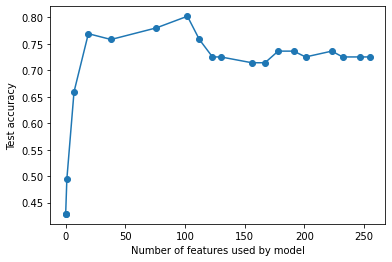

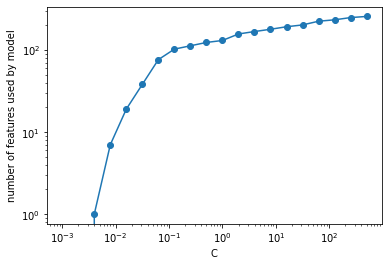

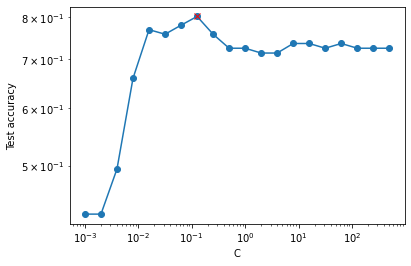

In [ ]:
# let's plot
import matplotlib.pyplot as plt
# plot accuracy vs number of features
plt.figure
plt.plot(feature_num, score,'o-')
plt.xlabel('Number of features used by model')
plt.ylabel('Test accuracy')
plt.show()

# plot number of features vs C
plt.figure
plt.loglog(C_range,feature_num,'o-')
plt.ylabel('number of features used by model')
plt.xlabel('C')
plt.show()

# plot C vs accuracy
plt.figure
plt.loglog(C_range,score,'o-')
plt.plot(C_range[np.argmax(score)],max(score), 'rx') # marker optimum C
plt.ylabel('Test accuracy')
plt.xlabel('C')
plt.show()

## Exercise 3.2 (**Advanced**): Recursive Feature Elimination (RFE) (2 points)

To understand the working principles of the RFE method, let's present its pseudocode:
* Start with all the variables (features) selected. Let's define $S=\left\lbrace 1, \ldots, D\right\rbrace $ the set of indices with the selected features (we start with all of them).

* For $d = 1, \ldots, D$
  * Train a SVM with using the features in $S$
  * Compute $ \displaystyle \Vert {\bf w} \Vert_2^2$ with the training data and using the features in $S$. That is, if ${\bf x}_S$ is the data ${\bf x}$, but limited to the features in $S$, we have to compute:
$$  \Vert {\bf w}_S \Vert_2^2 = \sum_{i=1}^N  \sum_{j=1}^N a^{(i)} a^{(j)} K({\bf x}^{(i)}_S,{\bf x}^{(j)}_S)$$

  * For each variable $d' \in S$, built ${\bf x}_{S-d'}= {\bf x}_S \setminus x_{d'}$ and compute $ \displaystyle \Vert {\bf w} \Vert_2^2$ with the data in ${\bf x}_{S-d'}$
$$  \Vert {\bf w}_{S-d'} \Vert_2^2 = \sum_{l=1}^L  \sum_{l'=1}^L a^{(l)} a^{(l')} K({\bf x}^{(l)}_{S-d'},{\bf x}^{(l')}_{S-d'})$$  
  * Remove the feature $d^*$, where
  $$d^{*} = \underset{d'}{\operatorname{argmin}} \left\lbrace \Vert {\bf w}_S \Vert_2^2 -\Vert {\bf w}_{S-d'} \Vert_2^2 \right\rbrace $$
  * Define $S = S \setminus d^*$
  * Stop when any criteria is reached (a given number of features or a degradation in the SVM performance)

<br>

Starting from this pseudocode, implement the RFE method for a kernelized SVM. Then, analyze the curve test accuracy vs. number of selected features when:
1. A RBF kernel is used (you can use the $C$  selected by CV in Exercise 1.2 and in each iteration define $\gamma$ as $1/\#S$).
2. The dual kernel of Exercise 2 (here, you can also use some parameters that you considered as optimum in Exercise 2).

Finally, don't forget to analyze the obtained results.


*Note: Scikit-Learn provides a function with a full implementation of the RFE method and extend this implementation for any classifier. In fact, this function, [`RFE( )`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html), let user select the classifier to consider, the number of selected features (parameter `n_features_to_select`) and the number of features removed in each step (`parameter_step`).  As result, in parameter `.ranking_` returns the ranking position of the each feature (i.e., .`ranking_[i]` corresponds to the ranking position of the i-th feature). However, this implementation is only thought for linear methods (it is quite similar to the pruning scheme for ridge regression used in the first HW). Here, I want you to work with the original version of this method [1] which is specifically proposed for no-linear SMVs; so, you have to implement the given method. Anyway, in case you have time, you can try to compare the proposed RFE method with that of Scikit-Learn.*

### Solution

In [ ]:
#@title RFE with Kernel=RBF
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data", header= None)
data = data.replace('?', np.nan).astype(float)
data.fillna(data.mean(),inplace=True)
Y = np.where(data[data.columns[-1]].values>1,0,1)  # Convert to binary classification: 0 normal, 1 arrhythmia
data1=data.copy(deep=True)


listFeat = data.columns[:-1].tolist() # list of indices of the features  [0,1,...,278]
check =  data.columns[:-1].tolist() # same as above. We keep it unchanged for future reference.
Out = [] # indices of removed features.
In = list(set(listFeat)-set(Out)) # indices of unremoved features
feat=[]
out2=[]
acc_test=[]
acc_train=[]

X = data[data.columns[:-1]].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

while len(feat)<279: # loop until feat (list of features removed) is full. i.e., until all features
# are removed


  if len(feat)!=0:
    # construct new train and test set
    X_train=np.delete(X_train,Out,1) # delete columns (axis=1) with indicies in Out.
    X_test=np.delete(X_test,Out,1)

  # define model with rbf kernel, using optimum C from exercise 1
  model = SVC(kernel='rbf',C=10)

  # fit the model with new training set
  model.fit(X_train,Y_train)
  # output accuracy scores given by the model
  acc_test.append(model.score(X_test,Y_test))
  acc_train.append(model.score(X_train,Y_train))

  # calculate the rbf kernel for the support vectors
  supVec=model.support_vectors_ # ndarray of shape (n_SV, n_features)

  K = rbf_kernel(supVec,gamma=1/supVec.shape[0])

  # dual_coef_: Dual coefficients of the support vector in
  # the decision function, multiplied by their targets.
  # calculate the cost function taking all features in 'In'
      # w = sum_i sum_j a(i)*a(j)*K(i,j), where a's are given by .dual_coef_ (1 x n_SV)
  w_allIn = np.sum(model.dual_coef_*(np.sum(model.dual_coef_.T * K,axis=1)),axis=1);

  nFtIn=X_train.shape[1] # list of indicies of the features
  w_in = np.zeros(nFtIn);
  # loop to determine which (remaining) feature produces the least change in cost
  for i in range(0,nFtIn):
    supVec_i = supVec[:,i] #
    kerMat_i =  rbf_kernel(supVec_i.reshape(-1,1),gamma=1/supVec_i.shape[0])
    kerMatRemove_i = K - kerMat_i
    # cost function without feature indexed i
    w_in[i] = np.sum(model.dual_coef_*(np.sum(model.dual_coef_.T * kerMatRemove_i,axis=1)),axis=1);

  # remove feature that procudes the least 'w_allIn-w_in' (difference in cost)
  Out=np.argmin(w_allIn-w_in)
  # add the removed feature in feat
  feat.append(Out)
  a=check.pop(Out)
  out2.append(a)

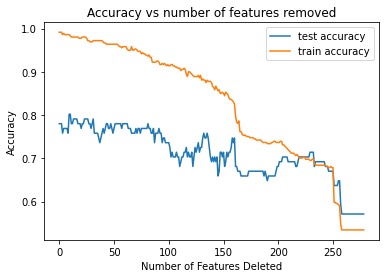

In [ ]:
n=np.arange(0,279,1)
plt.plot(n,acc_test,label='test accuracy')
plt.plot(n,acc_train,label='train accuracy')
plt.xlabel("Number of Features Deleted")
plt.ylabel('Accuracy')
plt.title("Accuracy vs number of features removed")
plt.legend()
plt.show()

*RBF kernal:*

The highest testing accuracy was achieved when we removed around 10 features, although the difference between train and test accuracies is large, suggesting overfitting when we use a large proportion of the available features. As RFE implements the model with less and less number of features, we encounter less and less overfitting. The optimal number of features removed with low overfitting is around 150. Therefore, we see that this method helps reduce overfitting, the number of dimensions and computational cost.

In [ ]:
#@title RFE with dual kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.svm import SVC
from sklearn.metrics.pairwise import linear_kernel

data1=data.copy(deep=True) # Creates a copy of the data to modify as we remove features
listFeat = data.columns[:-1].tolist() # list of indices of the features  [0,1,...,278]
check =  data.columns[:-1].tolist() # same as above. We keep it unchanged for future reference.
checkLin =  data.columns[:-1].tolist() # same as above. We keep it unchanged for future reference.
Out = [] # indices of removed features.
OutLin = [] # indices of removed features.
In = list(set(listFeat)-set(Out)) # indices of unremoved features
feat=[]
outDual=[]
outDualLin=[]
acc_test=[]
acc_testLin=[]
acc_train=[]
acc_trainLin=[]

X = data[data.columns[:-1]].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split features for the dual kernel
X_1=X_train[:,0:15]
X_2=X_train[:,15:279]
X_1_test=X_test[:,0:15]
X_2_test=X_test[:,15:279]

# Define the kernels
K1 = rbf_kernel(X_1,gamma=1/X_1.shape[0])
K1Lin = linear_kernel(X_1)
K2 = rbf_kernel(X_2,gamma=1/X_2.shape[0])
K2Lin = linear_kernel(X_2)
K1_test = rbf_kernel(X_1_test,X_1,gamma=1/X_1.shape[0])
K1_testLin = linear_kernel(X_1_test,X_1)
K2_test = rbf_kernel(X_2_test,X_2,gamma=1/X_1.shape[0])
K2_testLin = linear_kernel(X_2_test,X_2)

# i = lambda from cross validation of RBF + RBF and linear + linear kernel in exercise 2.2
i = 0.1 # same in both cases

# define the dual kernal
Kdual=K1*i+K2*(1-i)
KdualLin=K1Lin*i+K2Lin*(1-i)
Kdual_test=K1_test*i+K2_test*(1-i)
Kdual_testLin=K1_testLin*i+K2_testLin*(1-i)

devashish = 0
while devashish<264:

  if len(feat)!=0:
    X_train=np.delete(X_train,Out,1) # remove features stored in 'Out'

  # redefine the kernel using the new training set obtained in the previous line
  X_1=X_train[:,0:15]
  X_2=X_train[:,15:X_train.shape[1]]
  X_1_test=X_test[:,0:15]
  X_2_test=X_test[:,15:X_train.shape[1]]

# RBF + RBF
  K1 = rbf_kernel(X_1,gamma=1/X_1.shape[0])
  K2 = rbf_kernel(X_2,gamma=1/X_2.shape[0])
  K1_test = rbf_kernel(X_1_test,X_1,gamma=1/X_1.shape[0])
  K2_test = rbf_kernel(X_2_test,X_2,gamma=1/X_1.shape[0])
  Kdual=K1*i+K2*(1-i)
  Kdual_test=K1_test*i+K2_test*(1-i)

# Linear + Linear
  K1Lin = linear_kernel(X_1)
  K2Lin = linear_kernel(X_2)
  K1_testLin = linear_kernel(X_1_test,X_1)
  K2_testLin = linear_kernel(X_2_test,X_2)
  KdualLin=K1Lin*i+K2Lin*(1-i)
  Kdual_testLin=K1_testLin*i+K2_testLin*(1-i)

  # define and fit the SVC model

  model = SVC(kernel='precomputed',C=10) # this is the C that gives the best results in 2.2
  linmodel = SVC(kernel='precomputed',C=0.1) # this is the C that gives the best results in 2.2
  model.fit(Kdual, Y_train)
  linmodel.fit(KdualLin,Y_train)
  # calculate the kernel of support vectors given by the model
  KersupVec=Kdual[model.support_] # support_ gives the indices of support vectors.
  KersupVecLin=KdualLin[linmodel.support_] # support_ gives the indices of support vectors.

  # output accuracies
  acc_train.append(model.score(Kdual,Y_train))
  acc_trainLin.append(model.score(KdualLin,Y_train))
  acc_test.append(model.score(Kdual_test,Y_test))
  acc_testLin.append(model.score(Kdual_testLin,Y_test))

  # cost function with all features in 'In'
  cost_allIn = np.sum(model.dual_coef_*(np.sum(model.dual_coef_.T * KersupVec,axis=1)),axis=1);
  cost_allInLin = np.sum(linmodel.dual_coef_*(np.sum(linmodel.dual_coef_.T * KersupVecLin,axis=1)),axis=1);
  nFtIn=X_1.shape[1]+X_2.shape[1] # total number of features in this iteration
  cost_in = np.zeros(nFtIn); # initialize
  # RBF + RBF
  for j in range(0,nFtIn):
    KersupVec_j = KersupVec[:,j]
    kerMatRemove_j = KersupVec - KersupVec_j.reshape(-1,1)
    # cost function without feature j
    cost_in[j] = np.sum(model.dual_coef_*(np.sum(model.dual_coef_.T * kerMatRemove_j,axis=1)),axis=1);

# linear + linear
  cost_inLin = np.zeros(nFtIn); # initialize

  for j in range(0,nFtIn):
    KersupVec_jLin = KersupVecLin[:,j]
    kerMatRemove_jLin = KersupVecLin - KersupVec_jLin.reshape(-1,1)
    # cost function without feature j
    cost_inLin[j] = np.sum(linmodel.dual_coef_*(np.sum(linmodel.dual_coef_.T * kerMatRemove_jLin,axis=1)),axis=1);

  Out=np.argmin(cost_allIn-cost_in)
  OutLin=np.argmin(cost_allInLin-cost_inLin)
  feat.append(Out)
  a=check.pop(Out)
  aLin=checkLin.pop(OutLin)
  outDual.append(a)
  outDualLin.append(aLin)

  devashish += 1

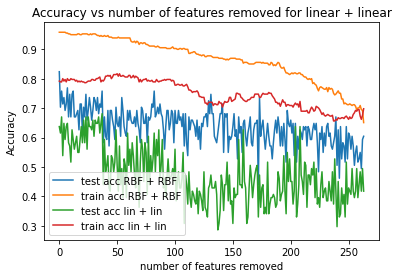

In [ ]:
import matplotlib.pyplot as plt
n=np.arange(0,264,1)
# RBF + RBF
plt.plot(n,acc_test,label='test acc RBF + RBF')
plt.plot(n,acc_train,label='train acc RBF + RBF')
plt.xlabel("number of features removed")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs number of features removed for RBF + RBF")

# linear + linear
plt.plot(n,acc_testLin,label='test acc lin + lin')
plt.plot(n,acc_trainLin,label='train acc lin + lin')
plt.xlabel("number of features removed")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs number of features removed for linear + linear")
plt.show()


*Dual Kernel*

We observe that this method also helps overcome overfitting after a certain number of features are removed. However, we do not observe any significant improvement over the model employing only the RBF Kernal.

The RBF + RBF model consistently performs better than the linear + linear model, which is an evidence for the fact that a nonlinear model is more suitable for the given dataset.

We see oscillations in the test accuracies as we vary the number of features which indicates bad generalization due to overfitting (the train accuracies are consistently much higher than the test accuracies).

# Discussion of questions.

**Q.** Is fixing the optimal C from previous exercises a good choice?

**Answer**.

**RBF + RBF**: Fixing the optimal C gave us roughly the same accuracy as in our GridSearchCV from 2.2 (according to our graph), but the best test score was also at 0 features removed, meaning that we gained nothing from removing features. This means that our choice of C was not optimal, because we would expect at least some improvement after feature removal. Our C value of 10 means that there was a fairly large penalty for misclassified points, which may not be optimal for this problem.

**only RBF**: We expect some improvement in the test accuracy after feature selection based on arguments similar to the ones in the previous paragraph. However, we see a decreasing trend in the test accuracy right from the beginning. We could vary C in order to obtain an improvement after feature selection.

**linear + linear**: This model performed poorly over both test and train datasets. Like the RBF + RBF model, the accuracy decreased as features were removed.

**Q.** Could we have trained a single SVM at the beginning and used these dual variables in all iterations?

**A.** Yes, doing so would help decrease the computational cost significantly. However, we should not expect an improvement in the test accuracies because computing the dual coefficients in each iteration is more accurate by design. The dual coefficients obtained from the first trained SVM contain information about all the features. As we remove features in each iteration, using the same dual coefficients would mean reusing information from removed features!